In [101]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [102]:
hr_df = pd.read_csv('HR_comma_sep.csv')

# Inspection

In [103]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [104]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [105]:
hr_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Benchmark
## Predicting that everyone stayed

In [106]:
all_zeros = np.zeros(14999,dtype= int )
all_zeros

array([0, 0, 0, ..., 0, 0, 0])

In [107]:
accuracy_score(hr_df['left'] , all_zeros)

#when every one is predicted as stayed the accuracy is 0.76

0.7619174611640777

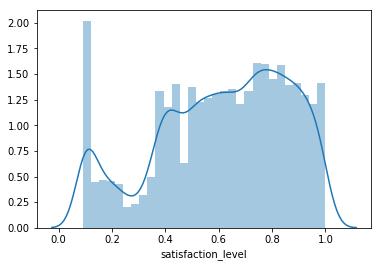

In [108]:
sns.distplot(hr_df['satisfaction_level'])


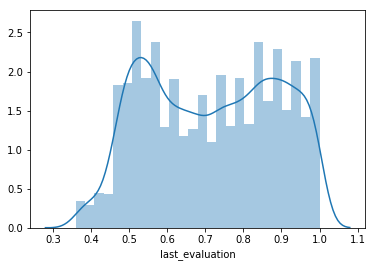

In [109]:
sns.distplot(hr_df['last_evaluation'])


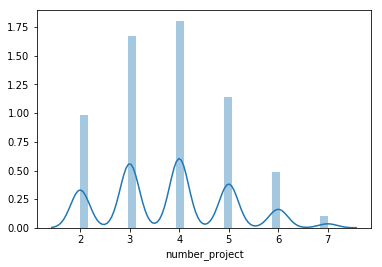

In [110]:
sns.distplot(hr_df['number_project'])

#must be rescaled


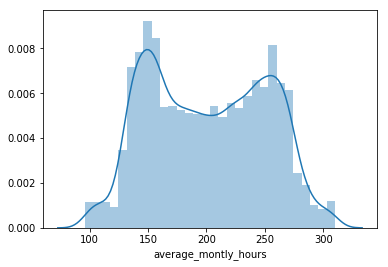

In [111]:
sns.distplot(hr_df['average_montly_hours'])

#must be rescaled since the values are high

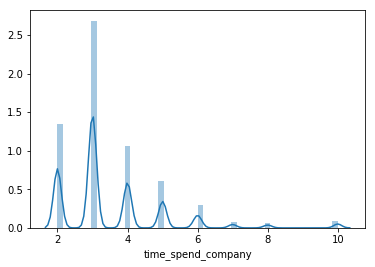

In [112]:
sns.distplot(hr_df['time_spend_company'])

#can be rescaled


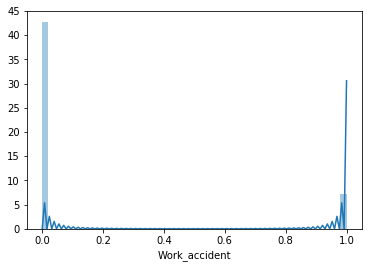

In [113]:
sns.distplot(hr_df['Work_accident'])


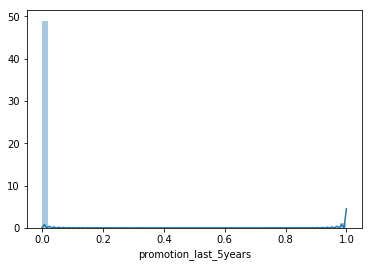

In [114]:
sns.distplot(hr_df['promotion_last_5years'])

scaling number_project , average_monthly_hours and time_spend_company between the range [0,1]

In [115]:
new_df = hr_df[['number_project','average_montly_hours','time_spend_company']].copy()
new_df
#using min-max scalar
min_max_scaler = preprocessing.MinMaxScaler()
scaled_df= min_max_scaler.fit_transform(new_df)
scaled_df

C:\Users\divya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.        , 0.28504673, 0.125     ],
       [0.6       , 0.77570093, 0.5       ],
       [1.        , 0.82242991, 0.25      ],
       ...,
       [0.        , 0.21962617, 0.125     ],
       [0.8       , 0.85981308, 0.25      ],
       [0.        , 0.28971963, 0.125     ]])

In [116]:
scaled_df = pd.DataFrame(scaled_df, columns=['number_project','average_montly_hours','time_spend_company'])
scaled_df

,number_project,average_montly_hours,time_spend_company
0,0.0,0.285047,0.125
1,0.6,0.775701,0.500
2,1.0,0.822430,0.250
3,0.6,0.593458,0.375
4,0.0,0.294393,0.125
5,0.0,0.266355,0.125
6,0.8,0.705607,0.250
7,0.6,0.761682,0.375
8,0.6,0.598131,0.375
9,0.0,0.214953,0.125


In [117]:
sales_dummmy = pd.get_dummies(hr_df['sales'])
sales_dummmy

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,1,0,0


In [118]:
salary_dummmy = pd.get_dummies(hr_df['salary'])
salary_dummmy

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


In [119]:

final_df = pd.concat([hr_df[['satisfaction_level','last_evaluation','Work_accident','promotion_last_5years']],scaled_df] , axis = 1)
final_df

,satisfaction_level,last_evaluation,Work_accident,promotion_last_5years,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,0,0,0.0,0.285047,0.125
1,0.80,0.86,0,0,0.6,0.775701,0.500
2,0.11,0.88,0,0,1.0,0.822430,0.250
3,0.72,0.87,0,0,0.6,0.593458,0.375
4,0.37,0.52,0,0,0.0,0.294393,0.125
5,0.41,0.50,0,0,0.0,0.266355,0.125
6,0.10,0.77,0,0,0.8,0.705607,0.250
7,0.92,0.85,0,0,0.6,0.761682,0.375
8,0.89,1.00,0,0,0.6,0.598131,0.375
9,0.42,0.53,0,0,0.0,0.214953,0.125


In [120]:
final_df = pd.concat([final_df , sales_dummmy] , axis=1)
final_df

,satisfaction_level,last_evaluation,Work_accident,promotion_last_5years,number_project,average_montly_hours,time_spend_company,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,0,0,0.0,0.285047,0.125,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,0,0,0.6,0.775701,0.500,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,0,0,1.0,0.822430,0.250,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,0,0,0.6,0.593458,0.375,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,0,0,0.0,0.294393,0.125,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,0,0,0.0,0.266355,0.125,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,0,0,0.8,0.705607,0.250,0,0,0,0,0,0,0,1,0,0
7,0.92,0.85,0,0,0.6,0.761682,0.375,0,0,0,0,0,0,0,1,0,0
8,0.89,1.00,0,0,0.6,0.598131,0.375,0,0,0,0,0,0,0,1,0,0
9,0.42,0.53,0,0,0.0,0.214953,0.125,0,0,0,0,0,0,0,1,0,0


In [121]:
final_df = pd.concat([final_df , salary_dummmy] , axis=1)
final_df

,satisfaction_level,last_evaluation,Work_accident,promotion_last_5years,number_project,average_montly_hours,time_spend_company,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.53,0,0,0.0,0.285047,0.125,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,0,0,0.6,0.775701,0.500,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,0,0,1.0,0.822430,0.250,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,0,0,0.6,0.593458,0.375,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,0,0,0.0,0.294393,0.125,0,0,0,0,0,0,0,1,0,0,0,1,0
5,0.41,0.50,0,0,0.0,0.266355,0.125,0,0,0,0,0,0,0,1,0,0,0,1,0
6,0.10,0.77,0,0,0.8,0.705607,0.250,0,0,0,0,0,0,0,1,0,0,0,1,0
7,0.92,0.85,0,0,0.6,0.761682,0.375,0,0,0,0,0,0,0,1,0,0,0,1,0
8,0.89,1.00,0,0,0.6,0.598131,0.375,0,0,0,0,0,0,0,1,0,0,0,1,0
9,0.42,0.53,0,0,0.0,0.214953,0.125,0,0,0,0,0,0,0,1,0,0,0,1,0


In [122]:
target = hr_df[['left']].copy()
target

,left
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [123]:
# creating training and test data

X_train, X_test, y_train, y_test = train_test_split(final_df, target, test_size=0.2, random_state=42)

In [124]:
#applying logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C = 0.1 )
lr

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [125]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train, y_train, cv = 5)
scores

C:\Users\divya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\divya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\divya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\divya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

array([0.77791667, 0.7875    , 0.77791667, 0.78541667, 0.77407253])

In [126]:
lr.fit(X_train, y_train)
print('Training accuracy:', lr.score(X_train, y_train))

Training accuracy: 0.7822318526543879


C:\Users\divya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\divya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [127]:
print('Test accuracy:', lr.score(X_test, y_test))

Test accuracy: 0.7723333333333333


In [131]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

y_pred = lr.predict(X_test)
print("Logistic Regression")
print("accuracy score" ,  accuracy_score(y_test, y_pred))

print("confusion matrix")
print(confusion_matrix(y_test, y_pred))

print("precision_recall_fscore_support " )
precision_recall_fscore_support(y_test, y_pred)

Logistic Regression
accuracy score 0.7723333333333333
confusion matrix
[[2131  163]
 [ 520  186]]
precision_recall_fscore_support 


(array([0.8038476 , 0.53295129]),
 array([0.92894507, 0.26345609]),
 array([0.86188069, 0.35260664]),
 array([2294,  706], dtype=int64))

In [132]:
#applying knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print("K-Nearest neighbour ")
print("accuracy score" ,  accuracy_score(y_test, prediction))

print("confusion matrix")
print(confusion_matrix(y_test, prediction))
print("precision_recall_fscore_support " )
precision_recall_fscore_support(y_test, prediction)

C:\Users\divya\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


K-Nearest neighbour 
accuracy score 0.9663333333333334
confusion matrix
[[2222   72]
 [  29  677]]
precision_recall_fscore_support 


(array([0.98711684, 0.90387183]),
 array([0.96861378, 0.95892351]),
 array([0.97777778, 0.93058419]),
 array([2294,  706], dtype=int64))

In [133]:
#applying support vector classifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
svm_clf = Pipeline(( ("scaler", StandardScaler()), ("linear_svc", LinearSVC(C=1, loss="hinge")) ))
svm_clf.fit(X_train, y_train)


C:\Users\divya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\divya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\divya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\divya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations."

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [134]:
y_pred = svm_clf.predict(X_test)

C:\Users\divya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [135]:
print("SVM Classifier ")
print("accuracy score" ,  accuracy_score(y_test, y_pred))

print("confusion matrix")
print(confusion_matrix(y_test, y_pred))
print("precision_recall_fscore_support " )
precision_recall_fscore_support(y_test, y_pred)

SVM Classifier 
accuracy score 0.7693333333333333
confusion matrix
[[2145  149]
 [ 543  163]]
precision_recall_fscore_support 


(array([0.79799107, 0.5224359 ]),
 array([0.93504795, 0.23087819]),
 array([0.86109996, 0.32023576]),
 array([2294,  706], dtype=int64))